In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.io as sio

In [2]:
sns.set(context='notebook', style='white')

# PCA - 2D to 1D

## load data

In [3]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

In [4]:
def get_y(df):
    return np.array(df.iloc[:, -1])

In [5]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat.get('X')
X.shape

(50, 2)

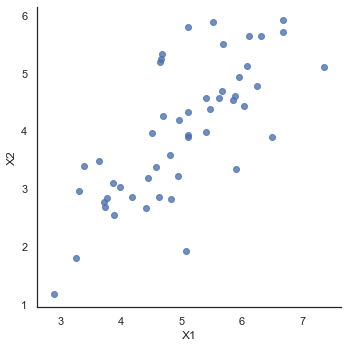

In [6]:
sns.lmplot('X1', 'X2', data=pd.DataFrame(X, columns={'X1', 'X2'}), fit_reg=False)
plt.show()

## normalize feature

In [7]:
def normalize_feature(df):
    return df.apply(lambda col: (col - col.mean()) / col.std())

In [8]:
def normalize(X):
    X_ = X.copy()
    m, n = X_.shape
    for col in range(n):
        X_[:, col] = (X_[:, col] - X_[:, col].mean()) / X_[:, col].std()
    
    return X_

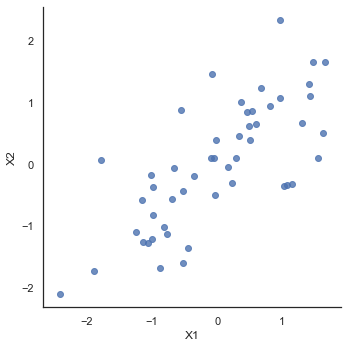

In [9]:
X_norm = normalize(X)
sns.lmplot('X1', 'X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']), fit_reg=False)
plt.show()

## implement PCA

![](img/sigma.png)

In [10]:
def covariance_matrix(X):
    m = X.shape[0]
    return (X.T @ X) / m

In [11]:
def PCA(X):
    """
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html
    Args:
        X ndarray(m, n)
    Returns:
        U ndarray(n, n): principle components
    """
    
    X_norm = normalize(X)
    Sigma = covariance_matrix(X_norm)
    U, S, V = np.linalg.svd(Sigma)
    
    return U, S, V

In [12]:
def project_data(X, U, k):
    '''
    projected n dim to k dim
    '''
    m, n = X.shape
    if k > n:
        raise ValueError('k should be lower dimension of n')
    
    return X @ U[:, :k]

In [13]:
def recover_data(Z, U):
    m, n = Z.shape
    if n >= U.shape[0]:
        raise ValueError('Z dimension is upper than U, you should recover lower dimension to higher')
    
    return Z @ U[:, :n].T

In [14]:
U, S, V = PCA(X)
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

## project data

In [15]:
Z = project_data(X_norm, U, 1)
Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

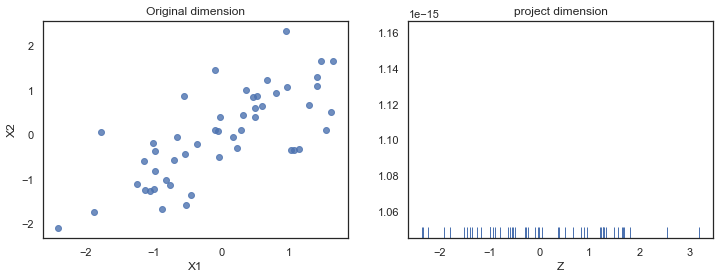

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
sns.regplot('X1', 'X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']), 
            fit_reg=False, ax = ax1)
ax1.set_title('Original dimension')

sns.rugplot(Z, ax=ax2)
ax2.set_xlabel('Z')
ax2.set_title('project dimension')
plt.show()

## recover data

In [17]:
X_recover = recover_data(Z, U)
X_recover[:10]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802]])

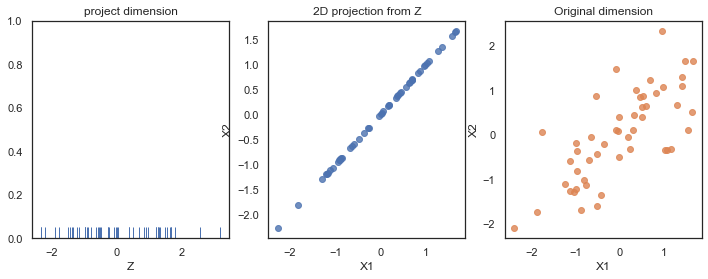

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))
sns.rugplot(Z, ax=ax1)
ax1.set_title('project dimension')
ax1.set_xlabel('Z')

sns.regplot('X1', 'X2', data=pd.DataFrame(X_recover, columns=['X1', 'X2']),
           fit_reg=False, ax=ax2)
ax2.set_title('2D projection from Z')

sns.regplot('X1', 'X2', data=pd.DataFrame(X_norm, columns=['X1', 'X2']),
           fit_reg=False, ax=ax3)
ax3.set_title('Original dimension')

plt.show()

In [19]:
X_recover[0], X_norm[0]

(array([-1.05805279, -1.05805279]), array([-0.52331306, -1.59279252]))

In [20]:
X_norm[0,0]

-0.5233130620222805

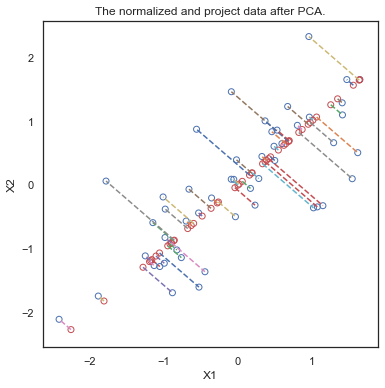

In [21]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('The normalized and project data after PCA.')

ax.scatter(X_norm[:, 0], X_norm[:, 1], c='', edgecolors='b')
ax.scatter(X_recover[:, 0], X_recover[:, 1], c='', edgecolors='r')
ax.plot([X_recover[:,0], X_norm[:,0]], [X_recover[:,1], X_norm[:,1]], '--')

plt.show()

## PCA - face data

## load data

In [22]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [23]:
X = np.array([x.reshape((32,32)).T.reshape(1024) for x in mat.get('X')])
X.shape

(5000, 1024)

In [24]:
def plot_n_image(X, n):
    '''
    n must to be a square number
    '''
    pic_sz = int(np.sqrt(X.shape[1]))
    grid_sz = int(np.sqrt(n))
    
    images = X[:n, :]
    fig, ax_arrs = plt.subplots(nrows=grid_sz, ncols=grid_sz, 
                               sharey=True, sharex=True, figsize=(8, 8))
    
    for r in range(grid_sz):
        for c in range(grid_sz):
            ax_arrs[r, c].imshow(images[r*grid_sz + c].reshape((pic_sz, pic_sz)))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))            
    
    plt.show()

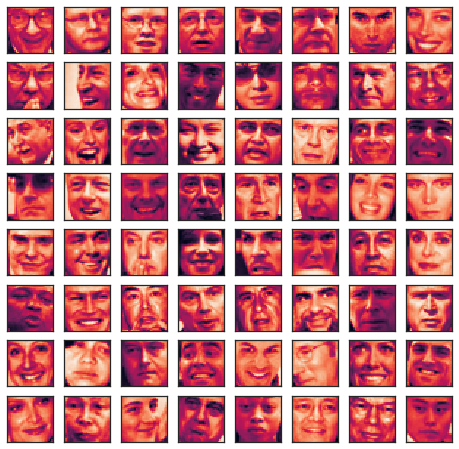

In [25]:
plot_n_image(X, n=64)

## run PCA

In [26]:
U, S, V = PCA(X)
U.shape

(1024, 1024)

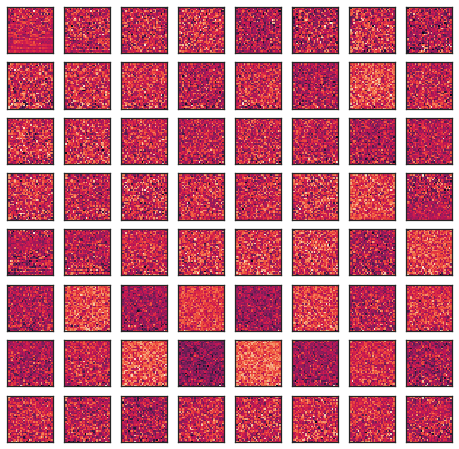

In [27]:
plot_n_image(U, 64)

## reduce dimension to k=100

In [28]:
Z = project_data(X, U, k=100)
Z.shape

(5000, 100)

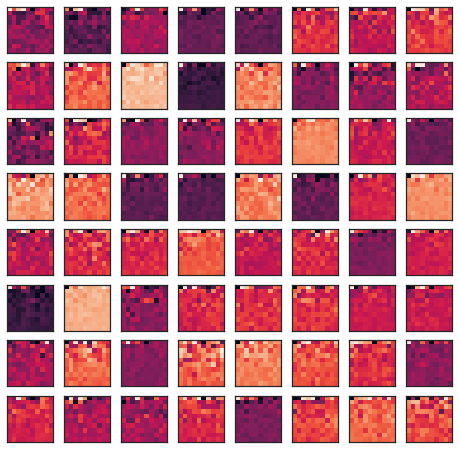

In [29]:
plot_n_image(Z, 64)

## recover data from k=100

lost some details, but they are strikingly similar, and only use 100 feature.

In [30]:
X_recover = recover_data(Z, U)
X_recover.shape

(5000, 1024)

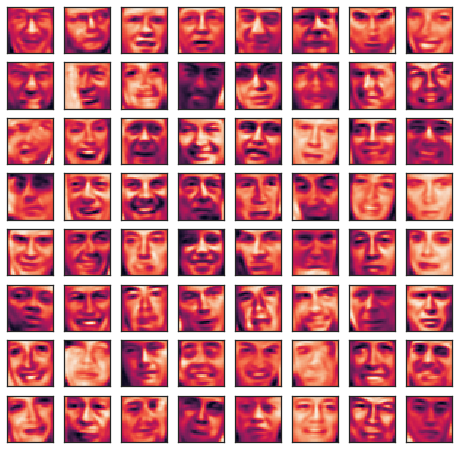

In [31]:
plot_n_image(X_recover, n=64)

# sklearn PCA

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [32]:
from sklearn.decomposition import PCA as sk_PCA

pca = sk_PCA(n_components=100)
Z = pca.fit_transform(X)
Z.shape

(5000, 100)

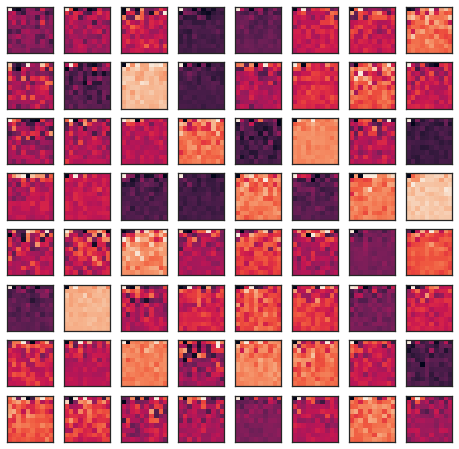

In [33]:
plot_n_image(Z, 64)

In [34]:
X_recover = pca.inverse_transform(Z)
X_recover.shape

(5000, 1024)

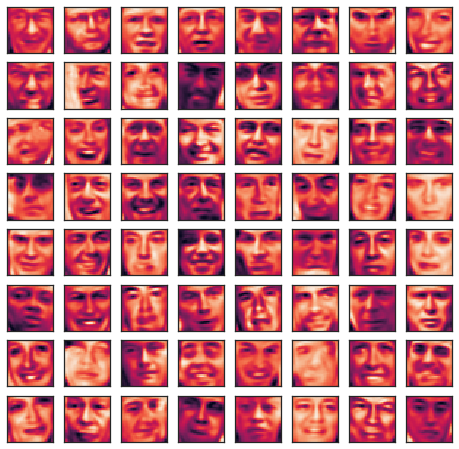

In [35]:
plot_n_image(X_recover, n=64)